## About Dataset

*** Context ***

The Western African Ebola virus epidemic (2013–2016) was the most widespread outbreak of Ebola virus disease (EVD) in history
Causing major loss of life and socioeconomic disruption in the region, mainly in Guinea, Liberia, and Sierra Leone.
The ** first cases** were recorded in Guinea in December 2013;
Later, the disease spread to neighboring Liberia and Sierra Leone, with minor outbreaks occurring elsewhere.
It caused significant mortality, with the case fatality rate reported which was initially considered, while the rate among hospitalized patients was 57–59%
The final numbers 28,616 people, including 11,310 deaths, for a case-fatality rate of 40%. ***

In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [5]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [6]:
def plot_confusion_matrix(Y,Y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(Y, Y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['DEATH_EVENT=1','DEATH_EVENT=0']); ax.yaxis.set_ticklabels(['DEATH_EVENT=1','DEATH_EVENT=0']) 
    plt.show() 

In [17]:
#load the ebola_outbreak dataset into pandas
ebola_df = pd.read_csv(r'C:\Users\user\Downloads\ebola_2014_2016_clean.csv')

In [18]:
ebola_df

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0
...,...,...,...,...
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0


### Data Cleaning

In [19]:
#evaluate missing data.
missing_data = ebola_df.isnull()
missing_data.head(5)

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [20]:
#count missing value per column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Country
False    2485
Name: Country, dtype: int64

Date
False    2485
Name: Date, dtype: int64

Cumulative no. of confirmed, probable and suspected cases
False    2477
True        8
Name: Cumulative no. of confirmed, probable and suspected cases, dtype: int64

Cumulative no. of confirmed, probable and suspected deaths
False    2485
Name: Cumulative no. of confirmed, probable and suspected deaths, dtype: int64



In [13]:
# Handle missing values by filling them with the mean value of column
ebola_df.fillna(ebola_df.mean(), inplace=True)

In [21]:
#calculate the mean of the column having missing data
mean=ebola_df["Cumulative no. of confirmed, probable and suspected cases"].mean()

In [22]:
#replace NaN with mean
ebola_df["Cumulative no. of confirmed, probable and suspected cases"].replace(np.nan, mean)

0         648.0
1          19.0
2        1026.0
3        1378.0
4        1261.0
         ...   
2480    10666.0
2481        1.0
2482        5.0
2483       20.0
2484        4.0
Name: Cumulative no. of confirmed, probable and suspected cases, Length: 2485, dtype: float64

Now we have a dataset with no missing data

### Data Wrangling

In [25]:
ebola_df.dtypes

Country                                                        object
Date                                                           object
Cumulative no. of confirmed, probable and suspected cases     float64
Cumulative no. of confirmed, probable and suspected deaths    float64
dtype: object

In [72]:
ebola_df["Cumulative no. of confirmed, probable and suspected deaths"].astype("float")

0        430.0
1          7.0
2        422.0
3        694.0
4        491.0
         ...  
2480    4806.0
2481       0.0
2482       4.0
2483       8.0
2484       1.0
Name: Cumulative no. of confirmed, probable and suspected deaths, Length: 2485, dtype: float64

In [73]:
ebola_df["Cumulative no. of confirmed, probable and suspected cases"].astype("float")

0         648.0
1          19.0
2        1026.0
3        1378.0
4        1261.0
         ...   
2480    10666.0
2481        1.0
2482        5.0
2483       20.0
2484        4.0
Name: Cumulative no. of confirmed, probable and suspected cases, Length: 2485, dtype: float64

### Explorative Data Analysis

In [74]:
ebola_df.shape

(2485, 4)

In [75]:
ebola_df.columns

Index(['Country', 'Date',
       'Cumulative no. of confirmed, probable and suspected cases',
       'Cumulative no. of confirmed, probable and suspected deaths'],
      dtype='object')

In [76]:
ebola_df.keys()

Index(['Country', 'Date',
       'Cumulative no. of confirmed, probable and suspected cases',
       'Cumulative no. of confirmed, probable and suspected deaths'],
      dtype='object')

In [77]:
ebola_df.describe(include="all")

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
count,2485,2485,2477.000000,2485.000000
unique,10,259,NaN,NaN
top,Liberia,2016-03-23,NaN,NaN
freq,365,12,NaN,NaN
mean,NaN,NaN,2553.678644,1028.347686
std,NaN,NaN,4427.118148,1656.064372
min,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,1.000000,0.000000
50%,NaN,NaN,8.000000,6.000000
75%,NaN,NaN,3657.000000,2386.000000


In [78]:
ebola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     2485 non-null   object 
 1   Date                                                        2485 non-null   object 
 2   Cumulative no. of confirmed, probable and suspected cases   2477 non-null   float64
 3   Cumulative no. of confirmed, probable and suspected deaths  2485 non-null   float64
dtypes: float64(2), object(2)
memory usage: 77.8+ KB


In [95]:
df=ebola_df['Country'].value_counts().to_frame()
df[:]

,Country
Liberia,365
Guinea,259
Sierra Leone,259
Nigeria,255
Senegal,254
United States of America,245
Spain,243
Mali,243
United Kingdom,221
Italy,141


<AxesSubplot:xlabel='count', ylabel='Country'>

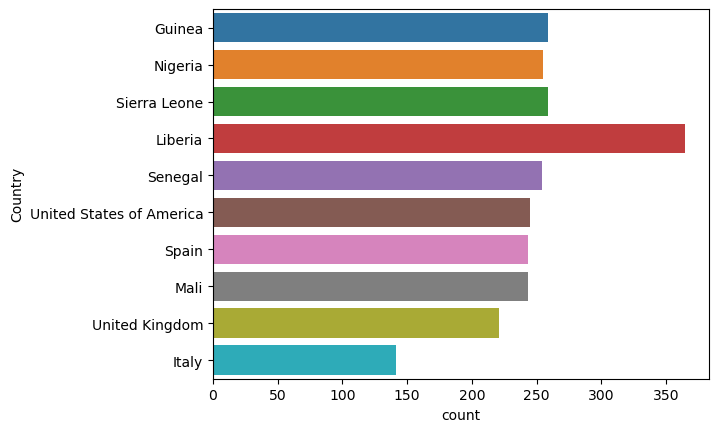

In [86]:
# Countplot
sns.countplot(data = ebola_df, y ="Country" ,label ="count")

C:\Users\user\Approam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of suspected cases')

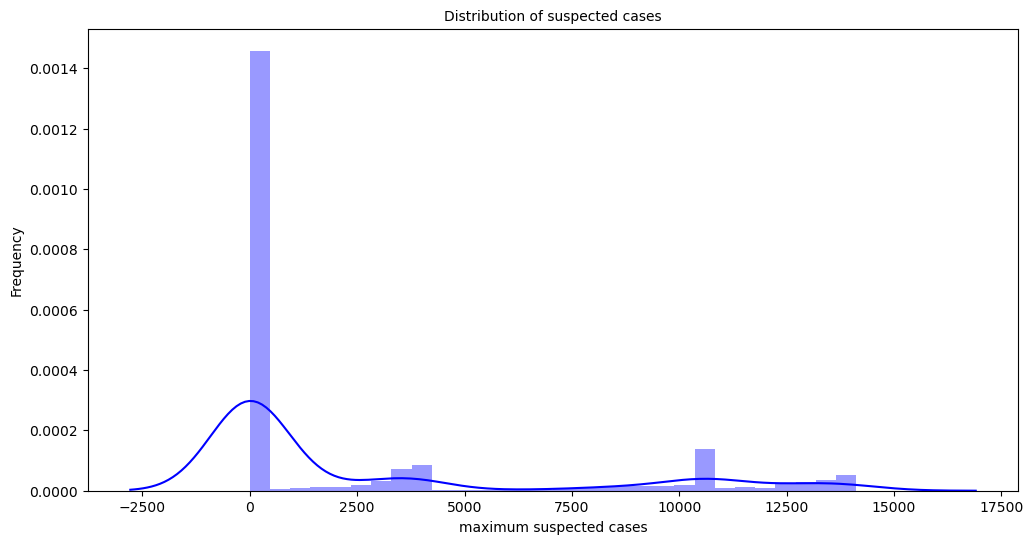

In [65]:
plt.figure(figsize=(12,6))
sns.distplot(ebola_df['Cumulative no. of confirmed, probable and suspected cases'], hist=True, bins=30, color='blue')
plt.xlabel('maximum suspected cases')
plt.ylabel('Frequency')
plt.title('Distribution of suspected cases', fontsize=10)

C:\Users\user\Approam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of suspected cases')

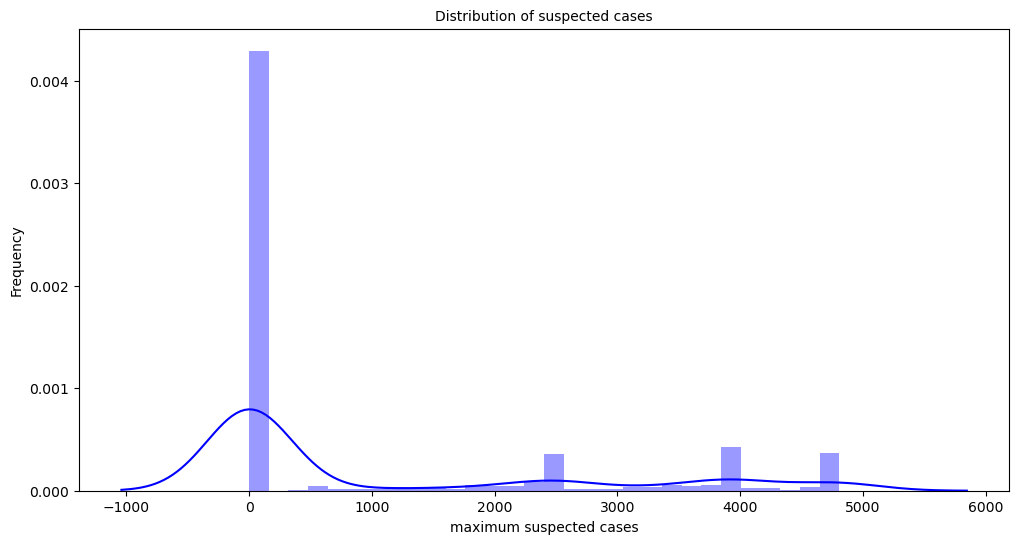

In [121]:
plt.figure(figsize=(12,6))
sns.distplot(ebola_df['Cumulative no. of confirmed, probable and suspected deaths'], hist=True, bins=30, color='blue')
plt.xlabel('maximum suspected cases')
plt.ylabel('Frequency')
plt.title('Distribution of suspected cases', fontsize=10)

In [91]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in ebola_df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
ebola_df['Date'] = year
ebola_df.head()
    

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014,648.0,430.0
1,Nigeria,2014,19.0,7.0
2,Sierra Leone,2014,1026.0,422.0
3,Liberia,2014,1378.0,694.0
4,Sierra Leone,2014,1261.0,491.0


In [96]:
df=ebola_df[['Country','Date']].value_counts().to_frame()
df[:]

,,0
Country,Date,
Liberia,2015,324
Mali,2015,220
Guinea,2015,220
United Kingdom,2015,220
Sierra Leone,2015,220
United States of America,2015,216
Spain,2015,216
Nigeria,2015,216
Senegal,2015,216


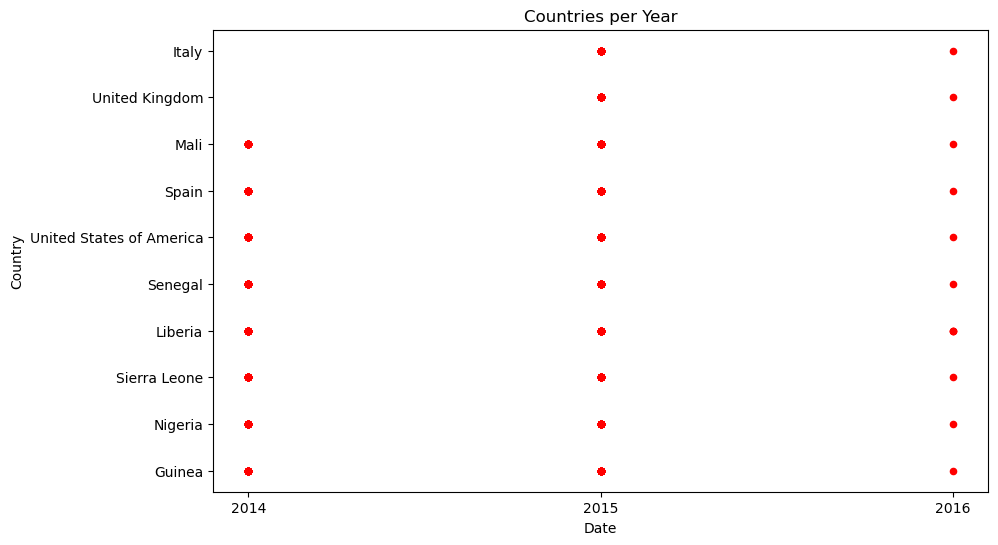

In [104]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
ebola_df.plot(kind='scatter', y='Country', x='Date', figsize=(10, 6), color='red')

plt.title('Countries per Year')
plt.xlabel('Date')
plt.ylabel('Country')

plt.show()

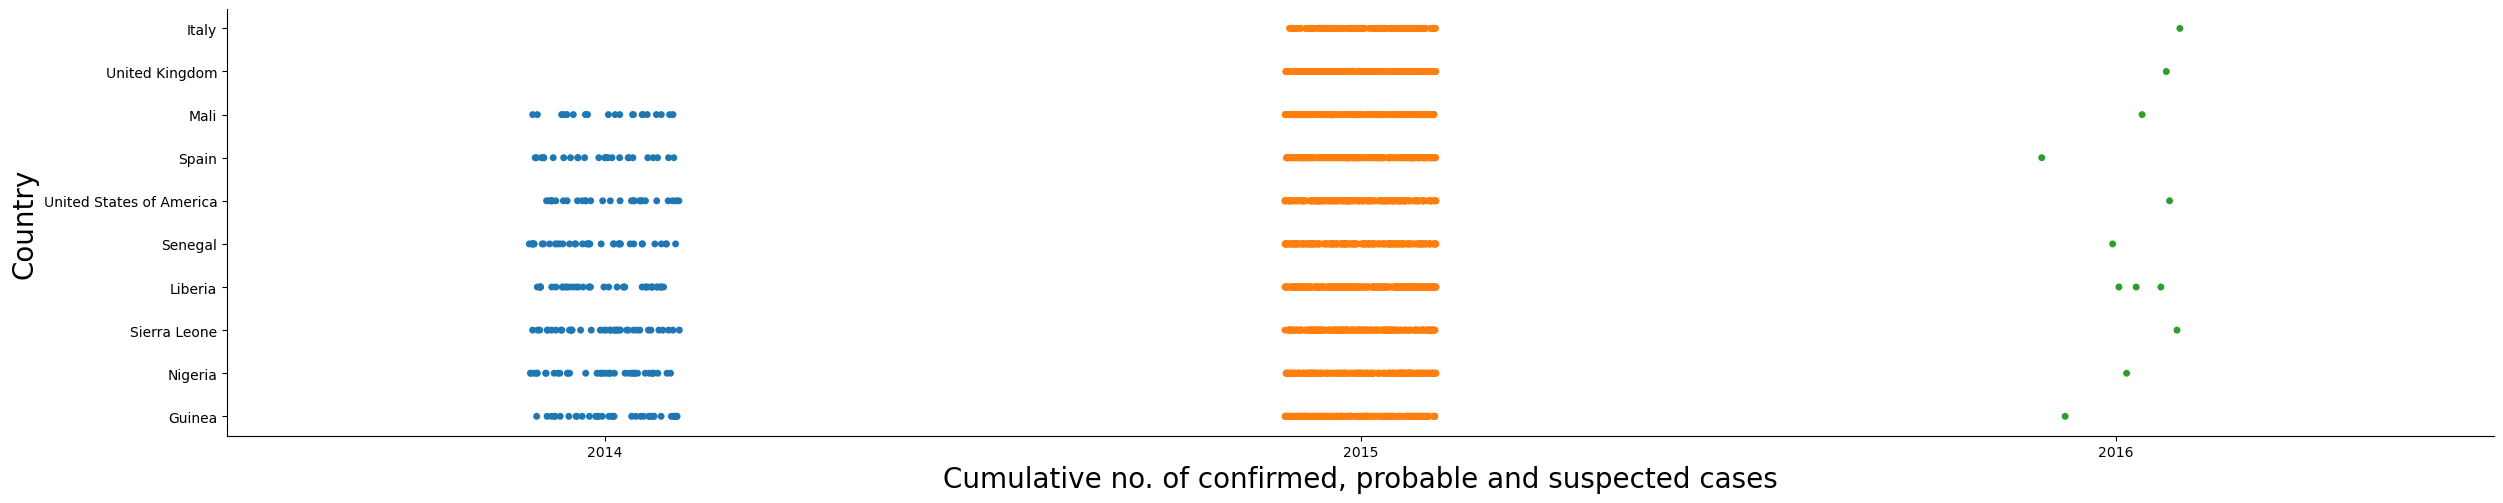

In [113]:
sns.catplot(y="Country", x="Date", data=ebola_df, aspect = 5)
plt.xlabel("Cumulative no. of confirmed, probable and suspected cases",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.show()

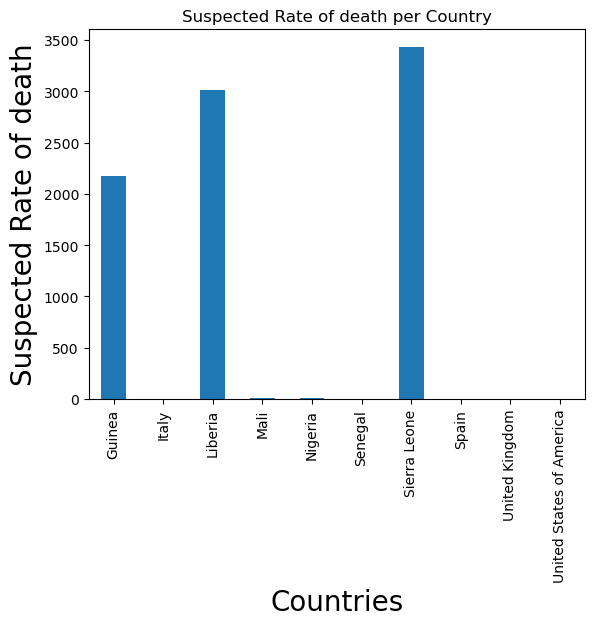

In [116]:
###Let's create a bar chart for the rate of death per country
ebola_df.groupby("Country").mean()['Cumulative no. of confirmed, probable and suspected deaths'].plot(kind='bar')
plt.xlabel("Countries",fontsize=20)
plt.ylabel("Suspected Rate of death",fontsize=20)
plt.title('Suspected Rate of death per Country')
plt.show()

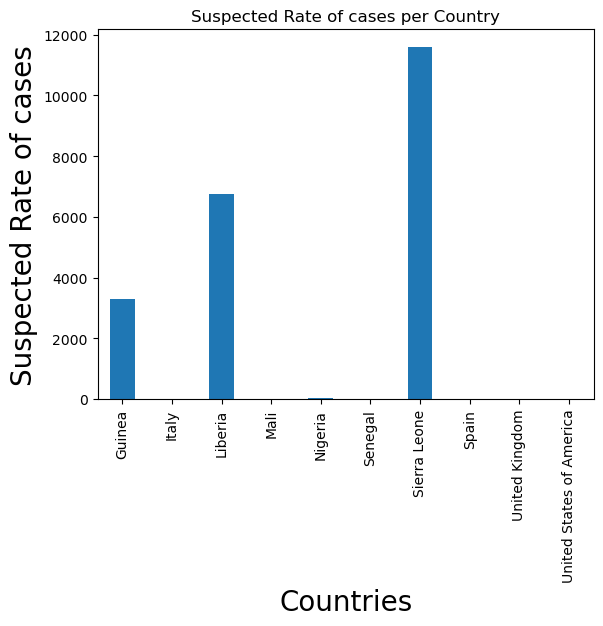

In [117]:
###Let's create a bar chart for the rate of death per country
ebola_df.groupby("Country").mean()['Cumulative no. of confirmed, probable and suspected cases'].plot(kind='bar')
plt.xlabel("Countries",fontsize=20)
plt.ylabel("Suspected Rate of cases",fontsize=20)
plt.title('Suspected Rate of cases per Country')
plt.show()

<AxesSubplot:>

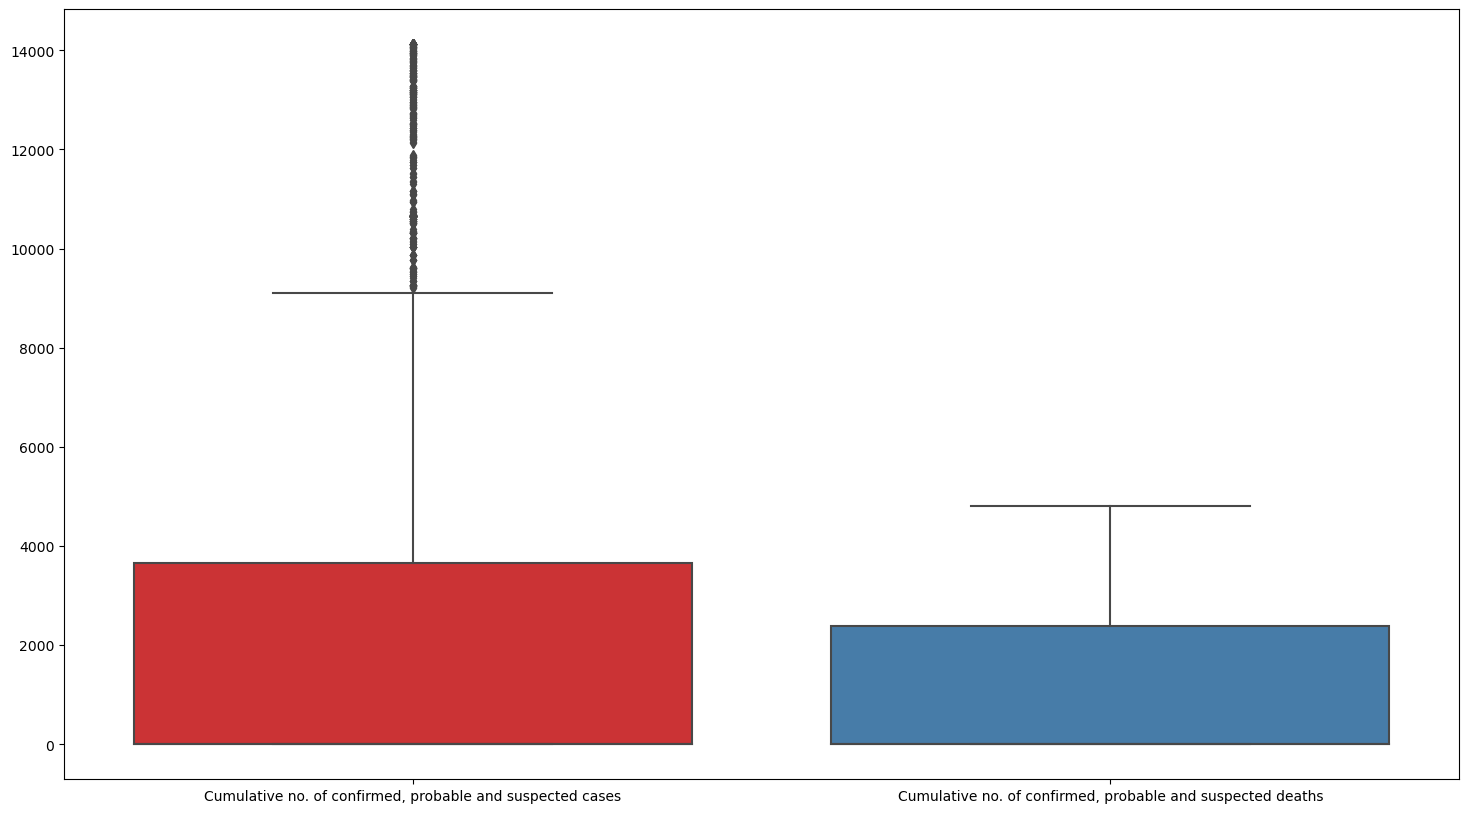

In [130]:
plt.figure(figsize=(18,10))
sns.boxplot(data = ebola_df, orient = "v", palette = "Set1")